**Course:** Neural Computing and Deep Learning
---
**Title:** Project 2
---
**Mahdi Mirfendereski - 401131065**
---


# Libraries

In [18]:
import numpy as np
import math
import json
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import random
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Datasets

In [2]:
df = pd.read_csv('../Inputs/Fire.csv')
df

,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
0,Melbourne,NaN,NaN,NaN,2.6,4.2,SW,43.0,SW,S,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Darwin,26.7,32.0,3.6,8.0,3.0,W,39.0,W,WNW,...,22.0,75.0,72.0,1007.6,1005.4,6.0,7.0,29.4,29.9,No
2,WaggaWagga,15.0,29.3,NaN,NaN,NaN,WNW,61.0,NNE,W,...,33.0,78.0,17.0,1007.8,1007.4,1.0,NaN,21.6,28.6,NaN
3,Townsville,24.0,30.0,4.0,8.0,NaN,ENE,61.0,ESE,E,...,13.0,77.0,77.0,1010.1,1007.2,8.0,7.0,29.0,29.0,Yes
4,Wollongong,21.5,22.2,0.2,NaN,NaN,N,50.0,SE,SW,...,13.0,86.0,93.0,1011.7,1010.5,8.0,8.0,22.1,19.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,Sale,8.2,16.8,6.4,2.2,2.4,W,57.0,NW,WNW,...,22.0,55.0,68.0,1010.3,1010.1,5.0,8.0,15.2,15.1,Yes
69995,Williamtown,7.5,17.5,0.0,6.4,10.8,WNW,41.0,WNW,SSE,...,19.0,57.0,39.0,1021.9,1022.1,1.0,2.0,12.7,15.8,No
69996,AliceSprings,26.8,38.9,0.0,11.2,6.0,N,69.0,E,SW,...,35.0,21.0,58.0,1006.3,1003.5,6.0,8.0,33.5,27.5,Yes
69997,Brisbane,16.6,27.9,8.4,0.0,8.7,NaN,NaN,SW,SW,...,2.0,83.0,49.0,1016.8,1013.3,1.0,3.0,20.4,27.2,NaN


# 1) Preprocessing

## 1-A (Missing values)

{'RedLightDir1', 'SteamDir', 'Home-Loc', 'FireAlarm', 'RedLightDir2'}


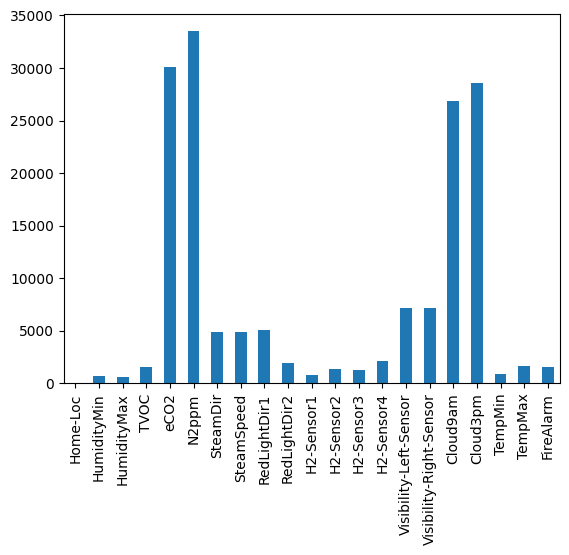

##################### Mode of categ cols #####################
RedLightDir1 ====> N
SteamDir ====> W
Home-Loc ====> Hobart
FireAlarm ====> No
RedLightDir2 ====> SE
##################### Avg of numerical cols #####################
HumidityMin ====> 12.217642283622624
HumidityMax ====> 23.28001711848649
TVOC ====> 2.287303890043821
eCO2 ====> 5.458218952175569
N2ppm ====> 7.613094153064326
SteamSpeed ====> 39.92479734651808
H2-Sensor1 ====> 14.045199574870098
H2-Sensor2 ====> 18.692535063476345
H2-Sensor3 ====> 68.71124200655797
H2-Sensor4 ====> 51.4309511015583
Visibility-Left-Sensor ====> 1017.6638844327515
Visibility-Right-Sensor ====> 1015.2686167070258
Cloud9am ====> 4.433639172582966
Cloud3pm ====> 4.5024140524540845
TempMin ====> 17.009222505865512
TempMax ====> 21.716109165380505


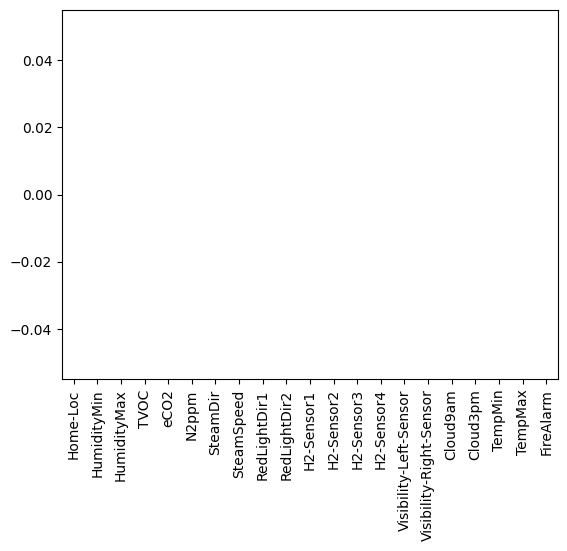

Home-Loc                   0
HumidityMin                0
HumidityMax                0
TVOC                       0
eCO2                       0
N2ppm                      0
SteamDir                   0
SteamSpeed                 0
RedLightDir1               0
RedLightDir2               0
H2-Sensor1                 0
H2-Sensor2                 0
H2-Sensor3                 0
H2-Sensor4                 0
Visibility-Left-Sensor     0
Visibility-Right-Sensor    0
Cloud9am                   0
Cloud3pm                   0
TempMin                    0
TempMax                    0
FireAlarm                  0
dtype: int64


,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
1,Darwin,26.7,32.0,3.600000,8.000000,3.000000,W,39.000000,W,WNW,...,22.0,75.0,72.0,1007.6,1005.4,6.0,7.000000,29.4,29.9,No
2,WaggaWagga,15.0,29.3,2.287304,5.458219,7.613094,WNW,61.000000,NNE,W,...,33.0,78.0,17.0,1007.8,1007.4,1.0,4.502414,21.6,28.6,No
3,Townsville,24.0,30.0,4.000000,8.000000,7.613094,ENE,61.000000,ESE,E,...,13.0,77.0,77.0,1010.1,1007.2,8.0,7.000000,29.0,29.0,Yes
4,Wollongong,21.5,22.2,0.200000,5.458219,7.613094,N,50.000000,SE,SW,...,13.0,86.0,93.0,1011.7,1010.5,8.0,8.000000,22.1,19.3,Yes
5,Sydney,9.4,17.7,0.000000,2.400000,2.700000,W,24.000000,WNW,N,...,13.0,85.0,56.0,1020.8,1015.0,6.0,6.000000,10.2,17.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,Sale,8.2,16.8,6.400000,2.200000,2.400000,W,57.000000,NW,WNW,...,22.0,55.0,68.0,1010.3,1010.1,5.0,8.000000,15.2,15.1,Yes
69995,Williamtown,7.5,17.5,0.000000,6.400000,10.800000,WNW,41.000000,WNW,SSE,...,19.0,57.0,39.0,1021.9,1022.1,1.0,2.000000,12.7,15.8,No
69996,AliceSprings,26.8,38.9,0.000000,11.200000,6.000000,N,69.000000,E,SW,...,35.0,21.0,58.0,1006.3,1003.5,6.0,8.000000,33.5,27.5,Yes
69997,Brisbane,16.6,27.9,8.400000,0.000000,8.700000,W,39.924797,SW,SW,...,2.0,83.0,49.0,1016.8,1013.3,1.0,3.000000,20.4,27.2,No


In [3]:
categ_cols = set(df.columns) - set(df._get_numeric_data().columns)
print(categ_cols)
num_col = list(df._get_numeric_data().columns)
pd.options.mode.chained_assignment = None  # default='warn'
missed_values = df.isna().sum()
missed_values.plot.bar()
plt.show()
df_a = df.dropna(thresh=14)
# df_a.isna().sum().plot.bar()
# plt.show()
## categorical

imputer_mode = SimpleImputer(strategy='most_frequent')
for categ_col in categ_cols:
    df_a[categ_col] = imputer_mode.fit_transform(df_a[categ_col].values.reshape(-1,1))[:,0].copy()
print("##################### Mode of categ cols #####################")
for categ_col in categ_cols:
    # print('---')
    print(categ_col,'====>',df_a[categ_col].mode()[0])
    # print(categ_col)
## numerical
imputer_mean = SimpleImputer(strategy='mean')
df_a[num_col] = imputer_mean.fit_transform(df_a[num_col])
print("##################### Avg of numerical cols #####################")
for avg,col in zip(imputer_mean.statistics_,imputer_mean.feature_names_in_):
    print(col,'====>',avg)

df_a.isna().sum().plot.bar()
plt.show()
print(df_a.isna().sum())
df_a

## 1-B (Normalization)

In [4]:
## Normalization
scaler = StandardScaler()
scaler.fit(df_a[num_col])
scaled = scaler.fit_transform(df_a[num_col])
scaled_df = pd.DataFrame(scaled, columns=num_col)
# concat
df_a_categ = pd.DataFrame(df_a[list(categ_cols)])
df_a_categ.reset_index(drop=True, inplace=True)
scaled_df.reset_index(drop=True, inplace=True)
df_b = pandas.concat([df_a_categ, scaled_df], axis=1)
df_b.reset_index()

# check
print(df_a_categ.shape)
print(scaled_df.shape)
print(df_b.shape)
# check
print(df_b.isna().sum())

df_b

(67840, 5)
(67840, 16)
(67840, 21)
RedLightDir1               0
SteamDir                   0
Home-Loc                   0
FireAlarm                  0
RedLightDir2               0
HumidityMin                0
HumidityMax                0
TVOC                       0
eCO2                       0
N2ppm                      0
SteamSpeed                 0
H2-Sensor1                 0
H2-Sensor2                 0
H2-Sensor3                 0
H2-Sensor4                 0
Visibility-Left-Sensor     0
Visibility-Right-Sensor    0
Cloud9am                   0
Cloud3pm                   0
TempMin                    0
TempMax                    0
dtype: int64


,RedLightDir1,SteamDir,Home-Loc,FireAlarm,RedLightDir2,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,...,H2-Sensor1,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax
0,W,W,Darwin,No,WNW,2.263824,1.232133,1.631659e-01,8.020926e-01,-1.670323e+00,...,0.902035,0.377119,0.331972,0.999414,-1.477489,-1.462059,0.688005,1.178664e+00,1.907278,1.188243
1,NNE,WNW,WaggaWagga,No,W,0.434927,0.850623,5.519952e-17,-2.802764e-16,3.215942e-16,...,-0.572100,1.631343,0.490336,-1.672940,-1.448127,-1.165755,-1.508184,-4.191501e-16,0.706645,0.999492
2,ESE,ENE,Townsville,Yes,E,1.841771,0.949533,2.128852e-01,8.020926e-01,3.215942e-16,...,-0.345310,-0.649065,0.437548,1.242356,-1.110462,-1.195385,1.566480,1.178664e+00,1.845707,1.057570
3,SE,N,Wollongong,Yes,SW,1.450981,-0.152606,-2.594483e-01,-2.802764e-16,3.215942e-16,...,0.561850,-0.649065,0.912641,2.019768,-0.875564,-0.706482,1.566480,1.650585e+00,0.783609,-0.350802
4,WNW,W,Sydney,No,N,-0.440443,-0.788456,-2.843079e-01,-9.650614e-01,-1.778947e+00,...,0.108270,-0.649065,0.859853,0.222002,0.460416,-0.039796,0.688005,7.067424e-01,-1.048124,-0.641188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67835,NW,W,Sale,Yes,WNW,-0.628022,-0.915626,5.112010e-01,-1.028174e+00,-1.887572e+00,...,1.809195,0.377119,-0.723791,0.805061,-1.081100,-0.765743,0.248767,1.650585e+00,-0.278489,-0.960612
67836,WNW,WNW,Williamtown,No,SSE,-0.737443,-0.816716,-2.843079e-01,2.971914e-01,1.153924e+00,...,1.128825,0.035057,-0.618215,-0.603998,0.621909,1.012086,-1.508184,-1.180942e+00,-0.663307,-0.858977
67837,E,N,AliceSprings,Yes,SW,2.279456,2.207103,-2.843079e-01,1.811895e+00,-5.840738e-01,...,0.675245,1.859384,-2.518587,0.319179,-1.668344,-1.743549,0.688005,1.650585e+00,2.538379,0.839780
67838,SW,W,Brisbane,No,SW,0.685033,0.652803,7.597975e-01,-1.722413e+00,3.935500e-01,...,-1.139075,-1.903290,0.754277,-0.118116,-0.126828,-0.291655,-1.508184,-7.090209e-01,0.521933,0.796222


## 1-C

In [5]:
df_c = df_b.copy()
label = set('FireAlarm')
categ_cols.remove('FireAlarm')
for categ_col in categ_cols:
    enc = OneHotEncoder()
    df_enc = enc.fit_transform(df_b[[categ_col]].values.reshape(-1,1)).toarray()
    tp = list(set(df_b[categ_col]))
    tp = [item + '_'+categ_col for item in tp]

    df_c = df_c.join(pd.DataFrame(df_enc ,columns=tp))

# print(categ_cols.remove('FireAlarm'))
# print(set(categ_cols).difference(label))
df_c = df_c.drop(categ_cols, axis=1)
df_c

,FireAlarm,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamSpeed,H2-Sensor1,H2-Sensor2,H2-Sensor3,...,SE_RedLightDir2,SSE_RedLightDir2,WNW_RedLightDir2,NW_RedLightDir2,SSW_RedLightDir2,W_RedLightDir2,ESE_RedLightDir2,ENE_RedLightDir2,SW_RedLightDir2,S_RedLightDir2
0,No,2.263824,1.232133,1.631659e-01,8.020926e-01,-1.670323e+00,-7.024736e-02,0.902035,0.377119,0.331972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,No,0.434927,0.850623,5.519952e-17,-2.802764e-16,3.215942e-16,1.600867e+00,-0.572100,1.631343,0.490336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Yes,1.841771,0.949533,2.128852e-01,8.020926e-01,3.215942e-16,1.600867e+00,-0.345310,-0.649065,0.437548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Yes,1.450981,-0.152606,-2.594483e-01,-2.802764e-16,3.215942e-16,7.653097e-01,0.561850,-0.649065,0.912641,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,No,-0.440443,-0.788456,-2.843079e-01,-9.650614e-01,-1.778947e+00,-1.209643e+00,0.108270,-0.649065,0.859853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67835,Yes,-0.628022,-0.915626,5.112010e-01,-1.028174e+00,-1.887572e+00,1.297028e+00,1.809195,0.377119,-0.723791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67836,No,-0.737443,-0.816716,-2.843079e-01,2.971914e-01,1.153924e+00,8.167211e-02,1.128825,0.035057,-0.618215,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67837,Yes,2.279456,2.207103,-2.843079e-01,1.811895e+00,-5.840738e-01,2.208545e+00,0.675245,1.859384,-2.518587,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67838,No,0.685033,0.652803,7.597975e-01,-1.722413e+00,3.935500e-01,5.397264e-16,-1.139075,-1.903290,0.754277,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 1-D

In [6]:
from sklearn.cluster import KMeans
df_d = df_c.copy()
df_d
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_d.loc[ : , df_d.columns != 'FireAlarm'])
np.sum(kmeans.labels_)
kmeans.cluster_centers_
kmeans.inertia_
# len(kmeans.cluster_centers_[0])
# df_d.loc[ : , df_d.columns != 'FireAlarm']

clusterwise_sse = {}
for point, label in zip((df_d.loc[ : , df_d.columns != 'FireAlarm']).iterrows(), kmeans.labels_):
    clusterwise_sse[point[0]] = np.square(point[1] - kmeans.cluster_centers_[label]).sum()
# print('##########')
# print(clusterwise_sse)
# print('##########')
# Q1,Q3 = np.percentile(list(clusterwise_sse.values()) , [25,75])    
# IQR = Q3 - Q1
# ul = Q3+1.5*IQR
# ll = Q1-1.5*IQR
outliers_ind = [] 
for ind in clusterwise_sse.keys():
    # if clusterwise_sse[ind] > ul or clusterwise_sse[ind] < ll:  
    if clusterwise_sse[ind] > 70:  
        outliers_ind.append(ind)
df_d = df_d.drop(outliers_ind,axis=0)
print('outliers: ',len(outliers_ind))
df_d.shape

outliers:  438


(67402, 114)

## 1-E

In [7]:
df_e = df_d.replace(['Yes','No'],[1, 0])
train_data, valid_data, test_data = np.split(df_e.sample(frac=1, random_state=0), [int(.7*len(df_d)), int(.8*len(df_d))])
train_data

,FireAlarm,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamSpeed,H2-Sensor1,H2-Sensor2,H2-Sensor3,...,SE_RedLightDir2,SSE_RedLightDir2,WNW_RedLightDir2,NW_RedLightDir2,SSW_RedLightDir2,W_RedLightDir2,ESE_RedLightDir2,ENE_RedLightDir2,SW_RedLightDir2,S_RedLightDir2
39683,0,0.356769,-0.519986,-3.571138e-02,-1.217512e+00,2.849252e-01,0.765310,1.128825,1.403302,0.648701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19087,0,0.388032,1.797333,-2.843079e-01,1.433219e+00,1.226341e+00,0.613390,-0.118520,-0.192984,-2.465799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13642,0,0.012874,-0.774326,-8.543068e-02,-2.802764e-16,3.215942e-16,-1.513482,-0.912285,-0.877106,1.018218,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28507,0,-0.940654,-0.887366,-2.843079e-01,-9.650614e-01,-1.634114e+00,1.600867,-1.592655,1.289282,0.384760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3653,0,0.169190,0.497373,-2.843079e-01,-1.837176e-02,1.400920e-01,-0.526006,0.335060,-0.192984,-1.198884,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39033,0,0.012874,1.020183,-2.843079e-01,-2.802764e-16,1.190132e+00,0.613390,-0.572100,-0.421024,-1.726765,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17864,0,1.669823,2.857082,-2.097289e-01,-2.802764e-16,3.215942e-16,0.765310,-0.572100,0.833200,-2.465799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31323,0,-0.737443,-0.901496,5.519952e-17,-2.802764e-16,3.215942e-16,-0.526006,0.335060,-0.421024,-0.143121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38763,0,0.434927,-0.025436,-2.843079e-01,3.603041e-01,9.366744e-01,0.081672,0.561850,0.833200,0.859853,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 2) Perceptron

Epoch 1/10
1475/1475 [==============================] - 5s 3ms/step - loss: 0.4203 - accuracy: 0.8167 - val_loss: 0.3540 - val_accuracy: 0.8445
Epoch 2/10
1475/1475 [==============================] - 4s 3ms/step - loss: 0.3594 - accuracy: 0.8431 - val_loss: 0.3437 - val_accuracy: 0.8478
Epoch 3/10
1475/1475 [==============================] - 4s 3ms/step - loss: 0.3537 - accuracy: 0.8472 - val_loss: 0.3415 - val_accuracy: 0.8499
Epoch 4/10
1475/1475 [==============================] - 4s 3ms/step - loss: 0.3515 - accuracy: 0.8487 - val_loss: 0.3403 - val_accuracy: 0.8504
Epoch 5/10
1475/1475 [==============================] - 4s 3ms/step - loss: 0.3503 - accuracy: 0.8499 - val_loss: 0.3399 - val_accuracy: 0.8503
Epoch 6/10
1475/1475 [==============================] - 4s 3ms/step - loss: 0.3496 - accuracy: 0.8505 - val_loss: 0.3395 - val_accuracy: 0.8534
Epoch 7/10
1475/1475 [==============================] - 4s 3ms/step - loss: 0.3492 - accuracy: 0.8506 - val_loss: 0.3391 - val_accuracy:

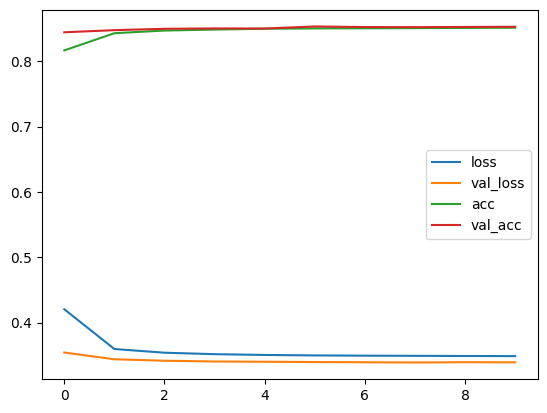

In [8]:
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(113,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
r = model.fit(train_data.drop('FireAlarm', axis=1), train_data['FireAlarm'],epochs=10,validation_data=(valid_data.drop('FireAlarm', axis=1), valid_data['FireAlarm']), batch_size=32, verbose=1)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# 3) MLP

In [47]:

def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int) -> list:
    
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    final_combination = []
    for item in layer_node_permutations:
        final_combination.append(list(item))
    if len(final_combination) > 16:
        return random.choices(final_combination, k=15)
    return final_combination


parameters = {}
for i in range(8):
    all_models = get_models(
        num_layers=i, 
        min_nodes_per_layer=64, 
        max_nodes_per_layer=256, 
        node_step_size=64
    )
    parameters[i] = all_models
parameters

# len(all_models)

{0: [[]],
 1: [[64], [128], [192], [256]],
 2: [[64, 64],
  [64, 128],
  [64, 192],
  [64, 256],
  [128, 64],
  [128, 128],
  [128, 192],
  [128, 256],
  [192, 64],
  [192, 128],
  [192, 192],
  [192, 256],
  [256, 64],
  [256, 128],
  [256, 192],
  [256, 256]],
 3: [[192, 192, 64],
  [256, 192, 64],
  [128, 192, 192],
  [256, 256, 192],
  [192, 128, 192],
  [128, 256, 192],
  [256, 128, 64],
  [192, 64, 256],
  [64, 256, 256],
  [192, 128, 256],
  [128, 64, 64],
  [192, 192, 128],
  [256, 192, 64],
  [128, 256, 192],
  [128, 128, 64]],
 4: [[256, 128, 192, 128],
  [128, 64, 256, 192],
  [192, 64, 192, 128],
  [64, 128, 192, 64],
  [192, 256, 128, 256],
  [128, 64, 256, 192],
  [192, 128, 64, 64],
  [192, 128, 128, 64],
  [256, 256, 192, 192],
  [192, 64, 256, 256],
  [192, 128, 64, 64],
  [256, 192, 64, 64],
  [64, 128, 128, 256],
  [192, 192, 192, 64],
  [192, 192, 64, 192]],
 5: [[128, 128, 256, 128, 192],
  [256, 256, 256, 64, 256],
  [256, 256, 256, 64, 128],
  [128, 128, 128, 192

In [8]:
report_NNs = {0: [[]],
 1: [[64], [128], [192], [256]],
 2: [[64, 64],
  [64, 128],
  [64, 192],
  [64, 256],
  [128, 64],
  [128, 128],
  [128, 192],
  [128, 256],
  [192, 64],
  [192, 128],
  [192, 192],
  [192, 256],
  [256, 64],
  [256, 128],
  [256, 192],
  [256, 256]],
 3: [[192, 192, 128],
  [64, 64, 256],
  [128, 256, 192],
  [192, 64, 128],
  [64, 128, 192],
  [192, 192, 192],
  [192, 256, 64],
  [192, 64, 256],
  [128, 128, 64],
  [128, 64, 256],
  [256, 64, 192],
  [256, 128, 192],
  [192, 128, 192],
  [64, 256, 192],
  [192, 128, 64]],
 4: [[256, 192, 128, 256],
  [192, 192, 192, 64],
  [64, 64, 64, 128],
  [64, 64, 128, 256],
  [192, 128, 64, 192],
  [256, 128, 192, 256],
  [128, 64, 64, 64],
  [256, 192, 128, 256],
  [128, 64, 192, 192],
  [192, 256, 128, 256],
  [192, 128, 192, 192],
  [128, 256, 256, 256],
  [192, 192, 192, 192],
  [64, 128, 128, 64],
  [256, 256, 192, 128]],
 5: [[256, 192, 256, 256, 128],
  [256, 64, 192, 256, 64],
  [192, 64, 192, 64, 192],
  [192, 128, 128, 128, 64],
  [128, 64, 128, 64, 128],
  [64, 192, 192, 128, 64],
  [256, 256, 256, 128, 64],
  [128, 256, 256, 64, 64],
  [64, 64, 256, 128, 128],
  [192, 128, 256, 192, 192],
  [128, 256, 64, 192, 192],
  [128, 64, 256, 128, 64],
  [192, 256, 256, 256, 192],
  [256, 256, 64, 128, 192],
  [64, 256, 192, 64, 128]],
 6: [[256, 128, 64, 192, 64, 128],
  [64, 256, 64, 192, 192, 64],
  [192, 256, 64, 192, 256, 192],
  [192, 192, 256, 256, 256, 256],
  [64, 128, 256, 128, 256, 256],
  [64, 192, 128, 128, 192, 128],
  [64, 128, 192, 64, 64, 192],
  [192, 64, 128, 64, 256, 192],
  [64, 128, 256, 256, 192, 64],
  [64, 256, 128, 128, 128, 256],
  [256, 256, 64, 64, 128, 64],
  [128, 64, 128, 64, 64, 256],
  [256, 128, 64, 64, 256, 128],
  [64, 192, 256, 64, 64, 64],
  [128, 64, 128, 64, 256, 64]],
 7: [[192, 192, 256, 128, 192, 256, 256],
  [256, 256, 64, 128, 256, 192, 192],
  [64, 128, 128, 64, 192, 128, 192],
  [128, 192, 64, 64, 256, 192, 192],
  [128, 128, 64, 192, 64, 64, 128],
  [64, 256, 128, 192, 128, 64, 192],
  [192, 256, 256, 128, 128, 128, 192],
  [192, 256, 256, 192, 128, 256, 128],
  [192, 256, 128, 64, 256, 128, 192],
  [256, 128, 192, 128, 256, 192, 192],
  [256, 128, 64, 192, 64, 128, 128],
  [192, 192, 256, 128, 192, 256, 256],
  [128, 256, 64, 128, 192, 192, 192],
  [256, 64, 192, 64, 128, 192, 64],
  [64, 128, 192, 256, 192, 128, 192]]}

Epoch 1/10
369/369 [==============================] - 3s 6ms/step - loss: 0.3569 - accuracy: 0.8462 - val_loss: 0.3334 - val_accuracy: 0.8586
Epoch 2/10
369/369 [==============================] - 2s 5ms/step - loss: 0.3299 - accuracy: 0.8582 - val_loss: 0.3280 - val_accuracy: 0.8592
Epoch 3/10
369/369 [==============================] - 2s 5ms/step - loss: 0.3162 - accuracy: 0.8649 - val_loss: 0.3226 - val_accuracy: 0.8619
Epoch 4/10
369/369 [==============================] - 2s 5ms/step - loss: 0.3046 - accuracy: 0.8699 - val_loss: 0.3219 - val_accuracy: 0.8611
Epoch 5/10
369/369 [==============================] - 2s 4ms/step - loss: 0.2936 - accuracy: 0.8741 - val_loss: 0.3259 - val_accuracy: 0.8623
Epoch 6/10
369/369 [==============================] - 2s 4ms/step - loss: 0.2816 - accuracy: 0.8805 - val_loss: 0.3308 - val_accuracy: 0.8568
Epoch 7/10
369/369 [==============================] - 2s 4ms/step - loss: 0.2676 - accuracy: 0.8846 - val_loss: 0.3403 - val_accuracy: 0.8579
Epoch 

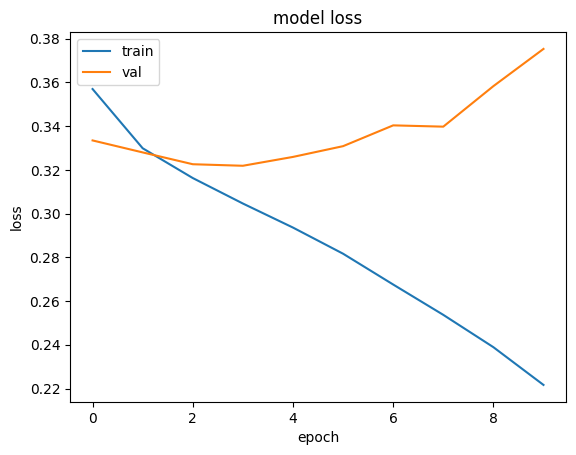

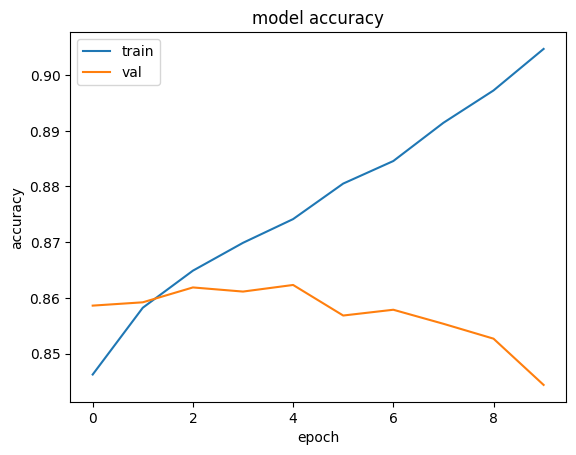

In [28]:
tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir = "./log" , histogram_freq = 1)
es_callback = keras.callbacks.EarlyStopping(monitor="accuracy", restore_best_weights=True, patience=20)

def train_nn(number_hidden_layers, number_hidden_units, train_feature, train_output, epochs, valid_feature, valid_output, batch_size, verbose, hidden_activation_func, output_activation_func):
    model = keras.Sequential()
    for i in range(number_hidden_layers):
      model.add(keras.layers.Dense(units=number_hidden_units[i], activation=hidden_activation_func, name=f"Dense_Layer_{i+1}"))

    ## output
    model.add(keras.layers.Dense(1, activation=output_activation_func, name="Output_Layer"))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    if verbose == 2:
      hist = model.fit(train_feature, train_output,epochs=epochs,validation_data=(valid_feature, valid_output), batch_size=batch_size, verbose=verbose-1, callbacks=[tf_callbacks, es_callback])
    else:
      hist = model.fit(train_feature, train_output,epochs=epochs,validation_data=(valid_feature, valid_output), batch_size=batch_size, verbose=verbose)
    train_accu = model.evaluate(train_feature, train_output, verbose=0)[1]
    valid_accu = model.evaluate(valid_feature, valid_output, verbose=0)[1]
    print(f"number of hidden layers: {number_hidden_layers}, architecture: {number_hidden_units} train_accuracy = {round(train_accu*100, 2)}, validation_accuracy = {round(valid_accu*100, 2)}")
    # hist = model.fit_generator()
    if verbose > 0:
      plt.figure()
      plt.plot(hist.history['loss'])
      plt.plot(hist.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train','val'], loc = 'upper left')
      plt.show()
      plt.figure()
      plt.plot(hist.history['accuracy'])
      plt.plot(hist.history['val_accuracy'])
      plt.title('model accuracy')
      plt.ylabel('accuracy')
      plt.xlabel('epoch')
      plt.legend(['train','val'], loc = 'upper left')
      plt.show()
    return model
#############################
train_feature = train_data.drop('FireAlarm', axis=1)
train_output = train_data['FireAlarm']
valid_feature = valid_data.drop('FireAlarm', axis=1)
valid_output = valid_data['FireAlarm']
verbose = 1
#############################
#############################
number_hidden_layers = 3
number_hidden_units = [128, 256, 192]
hidden_activation_func = 'relu'
output_activation_func = 'sigmoid'
batch_size = 128
epochs = 10
#############################

train_nn(number_hidden_layers, number_hidden_units, train_feature, train_output, epochs, valid_feature, valid_output, batch_size, verbose, hidden_activation_func, output_activation_func)

# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.fit(train_data.drop('FireAlarm', axis=1), train_data['FireAlarm'],epochs=5,validation_data=(valid_data.drop('FireAlarm', axis=1), valid_data['FireAlarm']), batch_size=20, verbose=1)

In [10]:
#############################
train_feature = train_data.drop('FireAlarm', axis=1)
train_output = train_data['FireAlarm']
valid_feature = valid_data.drop('FireAlarm', axis=1)
valid_output = valid_data['FireAlarm']
verbose = 0
#############################
#############################
hidden_activation_func = 'relu'
output_activation_func = 'sigmoid'
batch_size = 64
epochs = 10
#############################
for hidden_num in report_NNs.keys():
    for nn in report_NNs[hidden_num]:
        # print('hidden_num, layers:',hidden_num,nn)
        train_nn(hidden_num, nn, train_feature, train_output, epochs, valid_feature, valid_output, batch_size, verbose, hidden_activation_func, output_activation_func)


number of hidden layers: 0, architecture: [] train_accuracy = 85.11, validation_accuracy = 85.22
number of hidden layers: 1, architecture: [64] train_accuracy = 87.58, validation_accuracy = 85.99
number of hidden layers: 1, architecture: [128] train_accuracy = 88.12, validation_accuracy = 86.01
number of hidden layers: 1, architecture: [192] train_accuracy = 88.58, validation_accuracy = 86.07
number of hidden layers: 1, architecture: [256] train_accuracy = 88.51, validation_accuracy = 86.13
number of hidden layers: 2, architecture: [64, 64] train_accuracy = 88.59, validation_accuracy = 86.14
number of hidden layers: 2, architecture: [64, 128] train_accuracy = 88.63, validation_accuracy = 86.04
number of hidden layers: 2, architecture: [64, 192] train_accuracy = 88.83, validation_accuracy = 85.93
number of hidden layers: 2, architecture: [64, 256] train_accuracy = 88.97, validation_accuracy = 85.82
number of hidden layers: 2, architecture: [128, 64] train_accuracy = 90.06, validation_ac

In [11]:
parameters_2 = {}
def get_models_1_2(num_layers: int,
               node_options: list) -> list:
    
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    final_combination = []
    for item in layer_node_permutations:
        final_combination.append(list(item))
    if len(final_combination) > 16:
        return random.choices(final_combination, k=15)
    return final_combination

node_option = [[16, 32, 64, 128, 256],[16, 32, 64, 128]]
for i in range(1,3):
    all_models = get_models_1_2(
        num_layers=i, 
        node_options=node_option[i-1]
        )
    parameters_2[i] = all_models
parameters_2

{1: [[16], [32], [64], [128], [256]],
 2: [[16, 16],
  [16, 32],
  [16, 64],
  [16, 128],
  [32, 16],
  [32, 32],
  [32, 64],
  [32, 128],
  [64, 16],
  [64, 32],
  [64, 64],
  [64, 128],
  [128, 16],
  [128, 32],
  [128, 64],
  [128, 128]]}

In [12]:
#############################
train_feature = train_data.drop('FireAlarm', axis=1)
train_output = train_data['FireAlarm']
valid_feature = valid_data.drop('FireAlarm', axis=1)
valid_output = valid_data['FireAlarm']
verbose = 0
#############################
#############################
hidden_activation_func = 'relu'
output_activation_func = 'sigmoid'
batch_size = 64
epochs = 10
#############################
for hidden_num in parameters_2.keys():
    for nn in parameters_2[hidden_num]:
        # print('hidden_num, layers:',hidden_num,nn)
        train_nn(hidden_num, nn, train_feature, train_output, epochs, valid_feature, valid_output, batch_size, verbose, hidden_activation_func, output_activation_func)


number of hidden layers: 1, architecture: [16] train_accuracy = 86.68, validation_accuracy = 86.25
number of hidden layers: 1, architecture: [32] train_accuracy = 86.9, validation_accuracy = 86.11
number of hidden layers: 1, architecture: [64] train_accuracy = 87.57, validation_accuracy = 86.02
number of hidden layers: 1, architecture: [128] train_accuracy = 88.13, validation_accuracy = 85.99
number of hidden layers: 1, architecture: [256] train_accuracy = 88.79, validation_accuracy = 85.82
number of hidden layers: 2, architecture: [16, 16] train_accuracy = 86.85, validation_accuracy = 86.1
number of hidden layers: 2, architecture: [16, 32] train_accuracy = 86.75, validation_accuracy = 86.13
number of hidden layers: 2, architecture: [16, 64] train_accuracy = 86.94, validation_accuracy = 86.71
number of hidden layers: 2, architecture: [16, 128] train_accuracy = 86.94, validation_accuracy = 85.73
number of hidden layers: 2, architecture: [32, 16] train_accuracy = 87.61, validation_accura

Epoch 1/10
738/738 [==============================] - 4s 5ms/step - loss: 0.3803 - accuracy: 0.8328 - val_loss: 0.3413 - val_accuracy: 0.8509
Epoch 2/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3420 - accuracy: 0.8525 - val_loss: 0.3353 - val_accuracy: 0.8567
Epoch 3/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3337 - accuracy: 0.8555 - val_loss: 0.3297 - val_accuracy: 0.8634
Epoch 4/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3276 - accuracy: 0.8599 - val_loss: 0.3257 - val_accuracy: 0.8645
Epoch 5/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3232 - accuracy: 0.8618 - val_loss: 0.3263 - val_accuracy: 0.8642
Epoch 6/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3198 - accuracy: 0.8631 - val_loss: 0.3244 - val_accuracy: 0.8636
Epoch 7/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3167 - accuracy: 0.8650 - val_loss: 0.3242 - val_accuracy: 0.8620
Epoch 

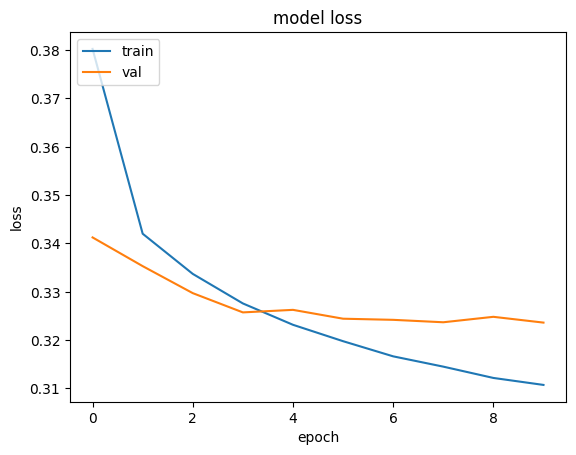

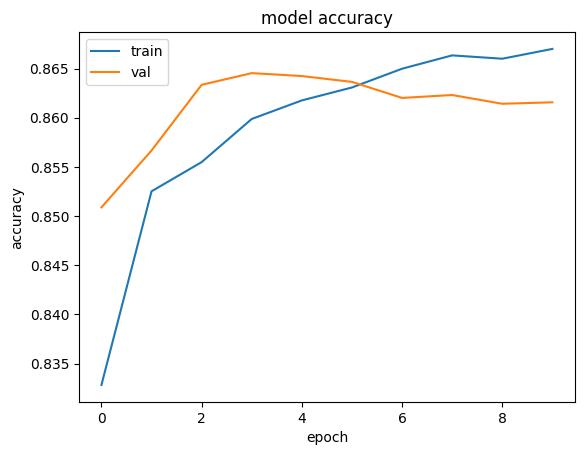

In [11]:
## Final Model
#############################
train_feature = train_data.drop('FireAlarm', axis=1)
train_output = train_data['FireAlarm']
valid_feature = valid_data.drop('FireAlarm', axis=1)
valid_output = valid_data['FireAlarm']
verbose = 2
#############################
#############################
hidden_activation_func = 'relu'
output_activation_func = 'sigmoid'
batch_size = 64
epochs = 10
hidden_num = 2
nn = [16, 64]
#############################


final_model = train_nn(hidden_num, nn, train_feature, train_output, epochs, valid_feature, valid_output, batch_size, verbose, hidden_activation_func, output_activation_func)


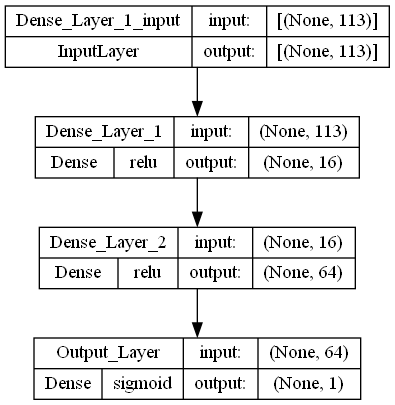

In [12]:
print(final_model)
keras.utils.plot_model(final_model, show_layer_activations=True, show_shapes=True, show_layer_names=True)


In [22]:
%tensorboard --logdir ./log

# 4) Activation Function

############### tanh ###############
Epoch 1/20
738/738 [==============================] - 4s 4ms/step - loss: 0.3703 - accuracy: 0.8377 - val_loss: 0.3455 - val_accuracy: 0.8487
Epoch 2/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3499 - accuracy: 0.8495 - val_loss: 0.3409 - val_accuracy: 0.8476
Epoch 3/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3470 - accuracy: 0.8510 - val_loss: 0.3380 - val_accuracy: 0.8562
Epoch 4/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3442 - accuracy: 0.8522 - val_loss: 0.3367 - val_accuracy: 0.8558
Epoch 5/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3420 - accuracy: 0.8529 - val_loss: 0.3339 - val_accuracy: 0.8573
Epoch 6/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3393 - accuracy: 0.8536 - val_loss: 0.3358 - val_accuracy: 0.8549
Epoch 7/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3362 - accuracy: 0.8560 - val_loss:

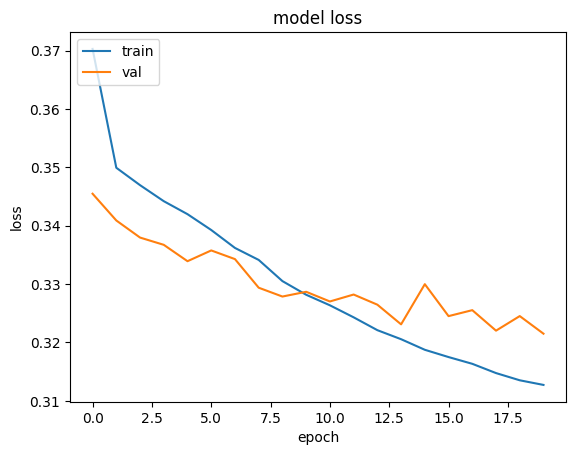

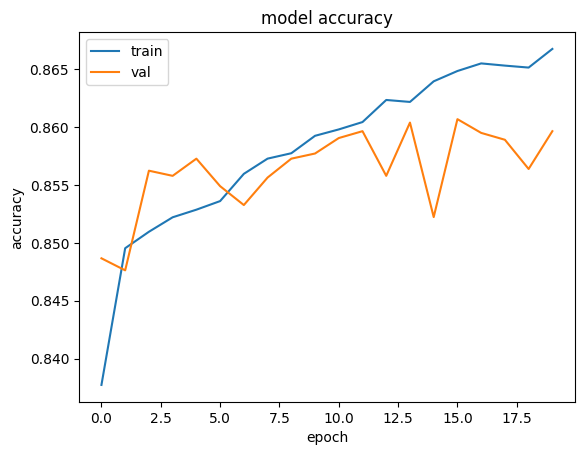

############### sigmoid ###############
Epoch 1/20
738/738 [==============================] - 4s 5ms/step - loss: 0.3928 - accuracy: 0.8268 - val_loss: 0.3475 - val_accuracy: 0.8475
Epoch 2/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3548 - accuracy: 0.8471 - val_loss: 0.3430 - val_accuracy: 0.8513
Epoch 3/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3508 - accuracy: 0.8497 - val_loss: 0.3413 - val_accuracy: 0.8494
Epoch 4/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3486 - accuracy: 0.8506 - val_loss: 0.3396 - val_accuracy: 0.8521
Epoch 5/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3478 - accuracy: 0.8508 - val_loss: 0.3398 - val_accuracy: 0.8524
Epoch 6/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3467 - accuracy: 0.8517 - val_loss: 0.3387 - val_accuracy: 0.8564
Epoch 7/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3456 - accuracy: 0.8519 - val_lo

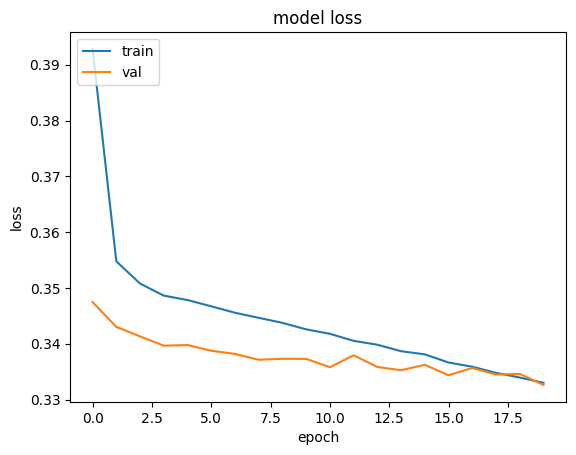

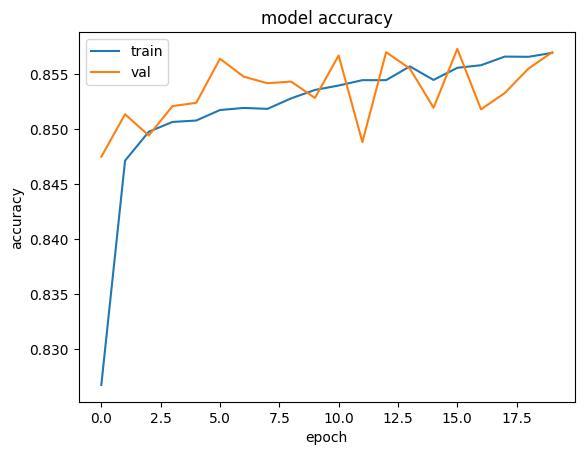

############### ReLU ###############
Epoch 1/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3801 - accuracy: 0.8326 - val_loss: 0.3381 - val_accuracy: 0.8522
Epoch 2/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3431 - accuracy: 0.8528 - val_loss: 0.3333 - val_accuracy: 0.8589
Epoch 3/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3363 - accuracy: 0.8562 - val_loss: 0.3294 - val_accuracy: 0.8610
Epoch 4/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3313 - accuracy: 0.8569 - val_loss: 0.3283 - val_accuracy: 0.8622
Epoch 5/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3272 - accuracy: 0.8590 - val_loss: 0.3284 - val_accuracy: 0.8592
Epoch 6/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3237 - accuracy: 0.8620 - val_loss: 0.3277 - val_accuracy: 0.8589
Epoch 7/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3204 - accuracy: 0.8632 - val_loss:

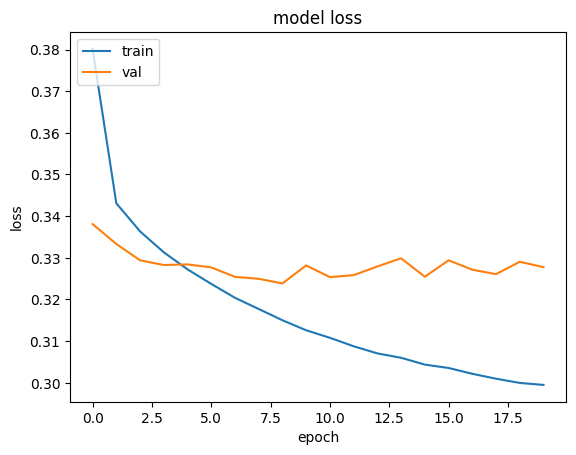

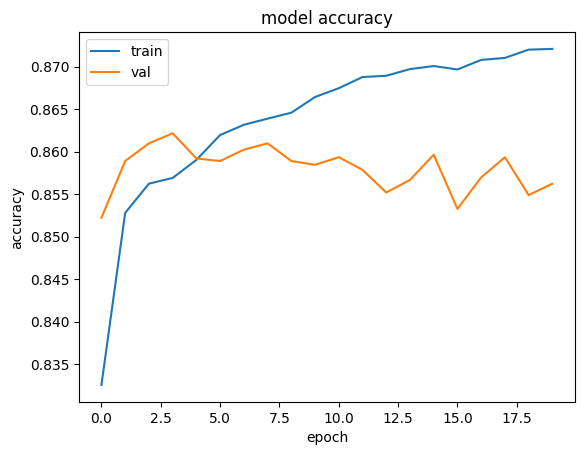

In [21]:
## Final Model
#############################
train_feature = train_data.drop('FireAlarm', axis=1)
train_output = train_data['FireAlarm']
valid_feature = valid_data.drop('FireAlarm', axis=1)
valid_output = valid_data['FireAlarm']
verbose = 1
#############################
#############################
# hidden_activation_func = 'relu'
output_activation_func = 'sigmoid'
batch_size = 64
epochs = 20
hidden_num = 2
nn = [16, 64]
#############################
for act_fun in ['tanh','sigmoid','ReLU']:
    print('###############',act_fun,'###############')
    act_model = train_nn(hidden_num, nn, train_feature, train_output, epochs, valid_feature, valid_output, batch_size, verbose, act_fun, output_activation_func)



# 5) Batch Size

############### 256 ###############
Epoch 1/10
185/185 [==============================] - 1s 5ms/step - loss: 0.4265 - accuracy: 0.8136 - val_loss: 0.3551 - val_accuracy: 0.8466
Epoch 2/10
185/185 [==============================] - 1s 4ms/step - loss: 0.3560 - accuracy: 0.8456 - val_loss: 0.3417 - val_accuracy: 0.8518
Epoch 3/10
185/185 [==============================] - 1s 4ms/step - loss: 0.3460 - accuracy: 0.8508 - val_loss: 0.3374 - val_accuracy: 0.8539
Epoch 4/10
185/185 [==============================] - 1s 4ms/step - loss: 0.3404 - accuracy: 0.8534 - val_loss: 0.3350 - val_accuracy: 0.8567
Epoch 5/10
185/185 [==============================] - 1s 4ms/step - loss: 0.3365 - accuracy: 0.8558 - val_loss: 0.3321 - val_accuracy: 0.8571
Epoch 6/10
185/185 [==============================] - 1s 4ms/step - loss: 0.3328 - accuracy: 0.8568 - val_loss: 0.3306 - val_accuracy: 0.8586
Epoch 7/10
185/185 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8587 - val_loss: 

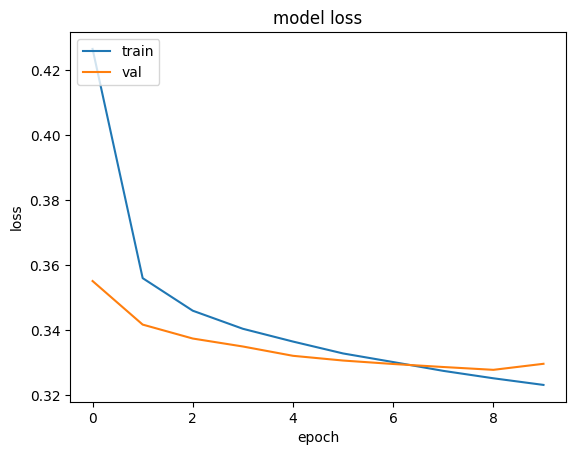

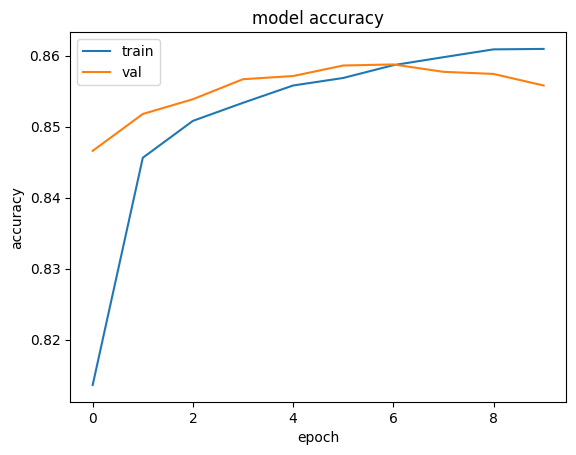

1475/1475 [==============================] - 1s 960us/step
47181
8347
[[34682  2297]
 [ 4152  6050]]


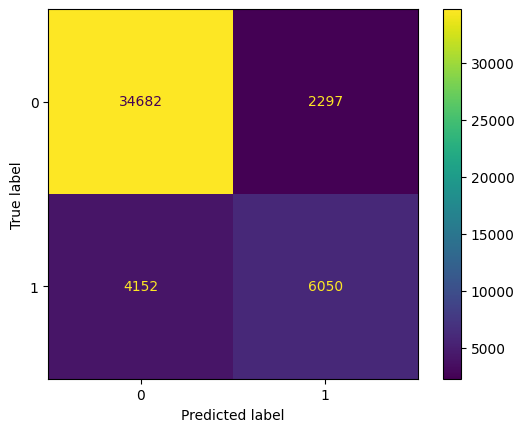

############### 64 ###############
Epoch 1/10
738/738 [==============================] - 4s 5ms/step - loss: 0.3763 - accuracy: 0.8348 - val_loss: 0.3373 - val_accuracy: 0.8558
Epoch 2/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3407 - accuracy: 0.8544 - val_loss: 0.3325 - val_accuracy: 0.8574
Epoch 3/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3339 - accuracy: 0.8561 - val_loss: 0.3300 - val_accuracy: 0.8596
Epoch 4/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3293 - accuracy: 0.8587 - val_loss: 0.3269 - val_accuracy: 0.8602
Epoch 5/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3251 - accuracy: 0.8602 - val_loss: 0.3264 - val_accuracy: 0.8610
Epoch 6/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3219 - accuracy: 0.8625 - val_loss: 0.3250 - val_accuracy: 0.8617
Epoch 7/10
738/738 [==============================] - 3s 4ms/step - loss: 0.3191 - accuracy: 0.8634 - val_loss: 0

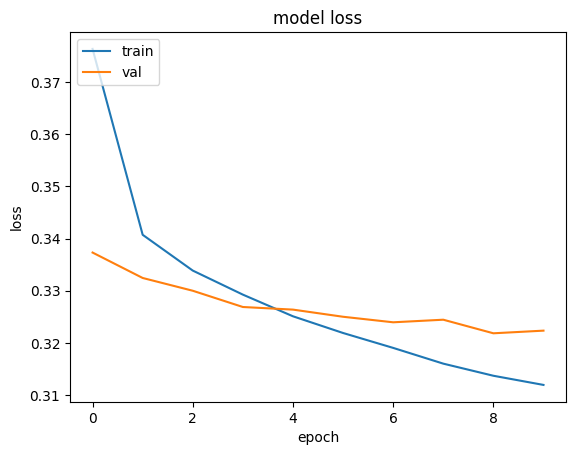

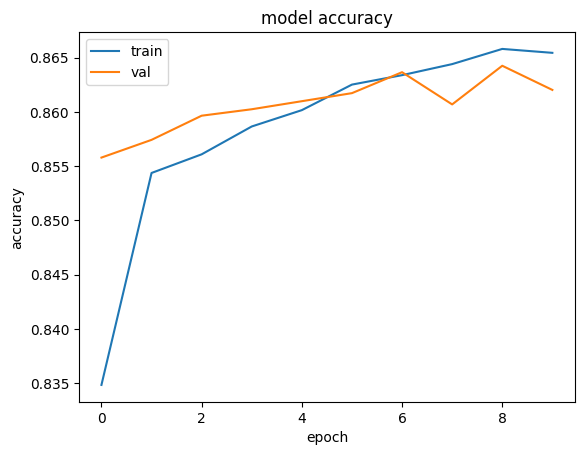

1475/1475 [==============================] - 2s 1ms/step
47181
7822
[[35062  1917]
 [ 4297  5905]]


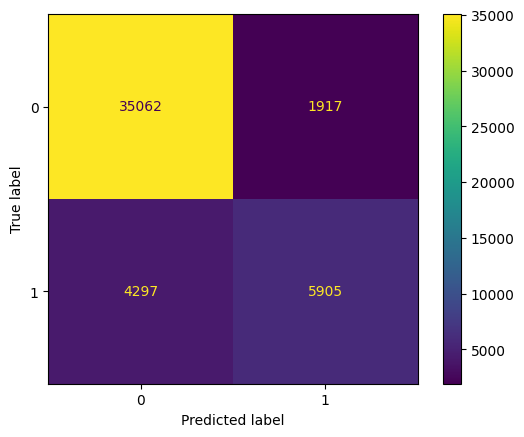

############### 16 ###############
Epoch 1/10
2949/2949 [==============================] - 13s 4ms/step - loss: 0.3610 - accuracy: 0.8436 - val_loss: 0.3336 - val_accuracy: 0.8589
Epoch 2/10
2949/2949 [==============================] - 11s 4ms/step - loss: 0.3374 - accuracy: 0.8561 - val_loss: 0.3310 - val_accuracy: 0.8595
Epoch 3/10
2949/2949 [==============================] - 11s 4ms/step - loss: 0.3305 - accuracy: 0.8589 - val_loss: 0.3259 - val_accuracy: 0.8583
Epoch 4/10
2949/2949 [==============================] - 12s 4ms/step - loss: 0.3251 - accuracy: 0.8619 - val_loss: 0.3263 - val_accuracy: 0.8602
Epoch 5/10
2949/2949 [==============================] - 11s 4ms/step - loss: 0.3210 - accuracy: 0.8627 - val_loss: 0.3215 - val_accuracy: 0.8626
Epoch 6/10
2949/2949 [==============================] - 11s 4ms/step - loss: 0.3170 - accuracy: 0.8654 - val_loss: 0.3217 - val_accuracy: 0.8599
Epoch 7/10
2949/2949 [==============================] - 11s 4ms/step - loss: 0.3136 - accuracy:

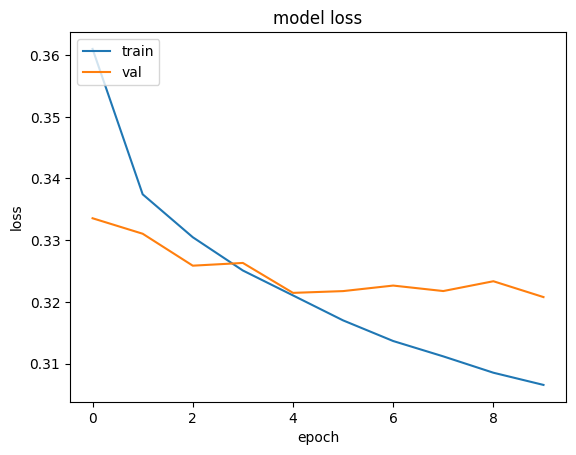

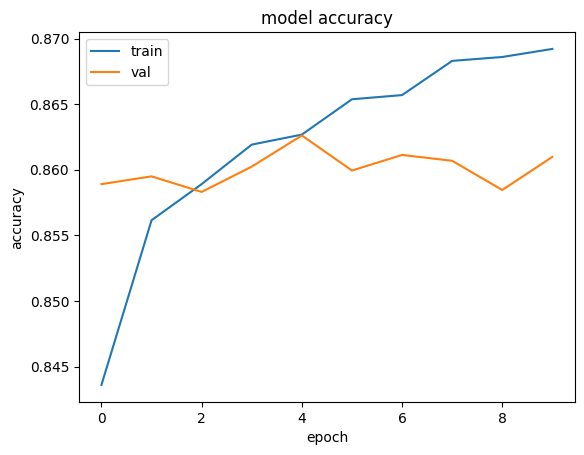

1475/1475 [==============================] - 2s 988us/step
47181
8074
[[35057  1922]
 [ 4050  6152]]


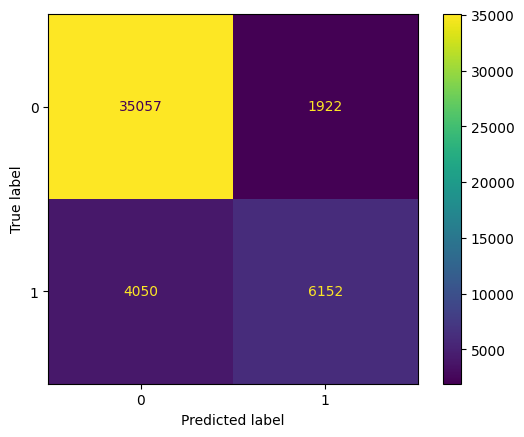

In [39]:
## Final Model
#############################
train_feature = train_data.drop('FireAlarm', axis=1)
train_output = train_data['FireAlarm']
valid_feature = valid_data.drop('FireAlarm', axis=1)
valid_output = valid_data['FireAlarm']
verbose = 1
#############################
#############################
hidden_activation_func = 'relu'
output_activation_func = 'sigmoid'
batch_size = 64
epochs = 10
hidden_num = 2
nn = [16, 64]
#############################
for batch in [256, 64, 16]:
    print('###############',batch,'###############')
    act_model = train_nn(hidden_num, nn, train_feature, train_output, epochs, valid_feature, valid_output, batch, verbose, hidden_activation_func, output_activation_func)
    predict_train = act_model.predict(train_feature)
    y_pred = np.where(predict_train<0.5,0,1)
    print(len(y_pred))
    print(y_pred.sum())

    cm = confusion_matrix(train_output.to_numpy(), y_pred, labels=[0, 1])
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()    
    # break

# 6) Overfitting

Epoch 1/100
738/738 [==============================] - 5s 6ms/step - loss: 0.3544 - accuracy: 0.8480 - val_loss: 0.3449 - val_accuracy: 0.8513
Epoch 2/100
738/738 [==============================] - 4s 6ms/step - loss: 0.3279 - accuracy: 0.8611 - val_loss: 0.3369 - val_accuracy: 0.8560
Epoch 3/100
738/738 [==============================] - 4s 6ms/step - loss: 0.3142 - accuracy: 0.8667 - val_loss: 0.3364 - val_accuracy: 0.8549
Epoch 4/100
738/738 [==============================] - 4s 5ms/step - loss: 0.3003 - accuracy: 0.8730 - val_loss: 0.3382 - val_accuracy: 0.8504
Epoch 5/100
738/738 [==============================] - 4s 5ms/step - loss: 0.2868 - accuracy: 0.8775 - val_loss: 0.3436 - val_accuracy: 0.8528
Epoch 6/100
738/738 [==============================] - 4s 5ms/step - loss: 0.2727 - accuracy: 0.8838 - val_loss: 0.3445 - val_accuracy: 0.8513
Epoch 7/100
738/738 [==============================] - 4s 5ms/step - loss: 0.2546 - accuracy: 0.8910 - val_loss: 0.3587 - val_accuracy: 0.8482

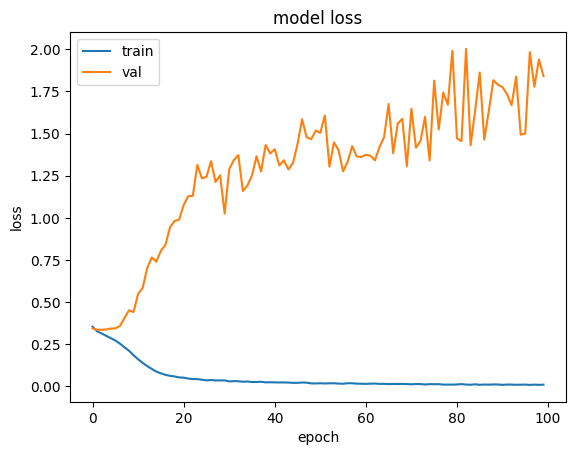

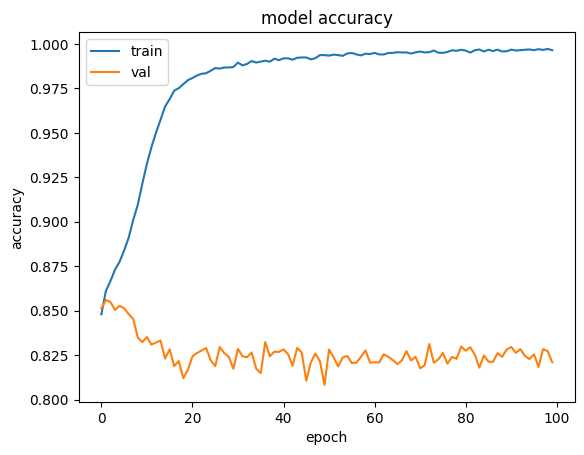

In [59]:
## Overfit Model
#############################
train_feature = train_data.drop('FireAlarm', axis=1)
train_output = train_data['FireAlarm']
valid_feature = valid_data.drop('FireAlarm', axis=1)
valid_output = valid_data['FireAlarm']
test_feature = test_data.drop('FireAlarm', axis=1)
test_output = test_data['FireAlarm']
verbose = 2
#############################
#############################
hidden_activation_func = 'relu'
output_activation_func = 'sigmoid'
batch_size = 64
epochs = 100
hidden_num = 5
nn = [256, 256, 256, 128, 64]
#############################


overfit_model = train_nn(hidden_num, nn, train_feature, train_output, epochs, test_feature, test_output, batch_size, verbose, hidden_activation_func, output_activation_func)


1475/1475 [==============================] - 2s 1ms/step
47181
10187
[[36940    39]
 [   54 10148]]


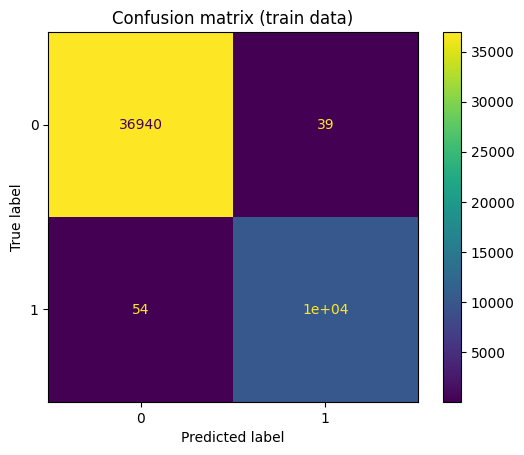

422/422 [==============================] - 1s 2ms/step
13481
2741
[[9418 1091]
 [1322 1650]]


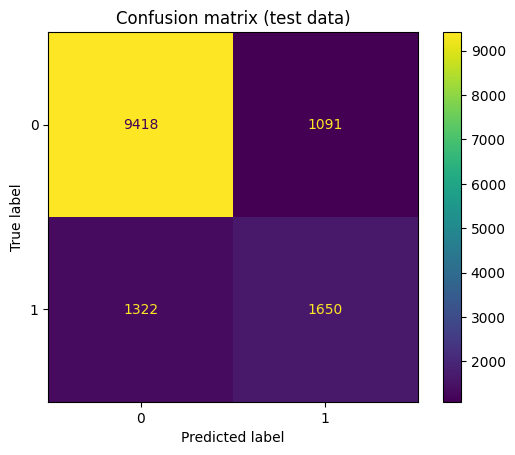

In [61]:
predict_train = overfit_model.predict(train_feature)
y_pred_train = np.where(predict_train<0.5,0,1)
print(len(y_pred_train))
print(y_pred_train.sum())
cm = confusion_matrix(train_output.to_numpy(), y_pred_train, labels=[0, 1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title ="Confusion matrix (train data)")
plt.show()    
predict_test = overfit_model.predict(test_feature)
y_pred_test = np.where(predict_test<0.5,0,1)
print(len(y_pred_test))
print(y_pred_test.sum())
cm = confusion_matrix(test_output.to_numpy(), y_pred_test, labels=[0, 1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title ="Confusion matrix (test data)")
plt.show()   



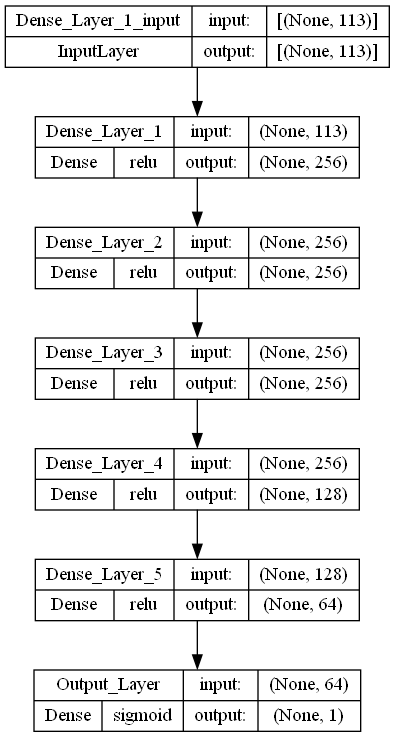

In [57]:
keras.utils.plot_model(overfit_model, show_layer_activations=True, show_shapes=True, show_layer_names=True)


In [62]:
%tensorboard --logdir ./log


UsageError: Line magic function `%tensorboard` not found.


# 7) Generalization

In [66]:
tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir = "./log" , histogram_freq = 1)
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=5)
def train_nn_gen(number_hidden_layers, number_hidden_units, train_feature, train_output, epochs, valid_feature, valid_output, batch_size, verbose, hidden_activation_func, output_activation_func):
    model = keras.Sequential()
    for i in range(number_hidden_layers):
      model.add(keras.layers.Dense(units=number_hidden_units[i], activation=hidden_activation_func, name=f"Dense_Layer_{i+1}"))

    ## output
    model.add(keras.layers.Dense(1, activation=output_activation_func, name="Output_Layer"))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    if verbose == 2:
      hist = model.fit(train_feature, train_output,epochs=epochs,validation_data=(valid_feature, valid_output), batch_size=batch_size, verbose=verbose-1, callbacks=[tf_callbacks, es_callback])
    else:
      hist = model.fit(train_feature, train_output,epochs=epochs,validation_data=(valid_feature, valid_output), batch_size=batch_size, verbose=verbose)
    train_accu = model.evaluate(train_feature, train_output, verbose=0)[1]
    valid_accu = model.evaluate(valid_feature, valid_output, verbose=0)[1]
    print(f"number of hidden layers: {number_hidden_layers}, architecture: {number_hidden_units} train_accuracy = {round(train_accu*100, 2)}, validation_accuracy = {round(valid_accu*100, 2)}")
    # hist = model.fit_generator()
    if verbose > 0:
      plt.figure()
      plt.plot(hist.history['loss'])
      plt.plot(hist.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train','val'], loc = 'upper left')
      plt.show()
      plt.figure()
      plt.plot(hist.history['accuracy'])
      plt.plot(hist.history['val_accuracy'])
      plt.title('model accuracy')
      plt.ylabel('accuracy')
      plt.xlabel('epoch')
      plt.legend(['train','val'], loc = 'upper left')
      plt.show()
    return model

Epoch 1/20
738/738 [==============================] - 5s 5ms/step - loss: 0.3781 - accuracy: 0.8336 - val_loss: 0.3547 - val_accuracy: 0.8460
Epoch 2/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3412 - accuracy: 0.8531 - val_loss: 0.3483 - val_accuracy: 0.8488
Epoch 3/20
738/738 [==============================] - 3s 5ms/step - loss: 0.3334 - accuracy: 0.8559 - val_loss: 0.3444 - val_accuracy: 0.8484
Epoch 4/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3278 - accuracy: 0.8591 - val_loss: 0.3425 - val_accuracy: 0.8509
Epoch 5/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3232 - accuracy: 0.8602 - val_loss: 0.3419 - val_accuracy: 0.8507
Epoch 6/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3199 - accuracy: 0.8622 - val_loss: 0.3394 - val_accuracy: 0.8529
Epoch 7/20
738/738 [==============================] - 3s 4ms/step - loss: 0.3167 - accuracy: 0.8641 - val_loss: 0.3393 - val_accuracy: 0.8528
Epoch 

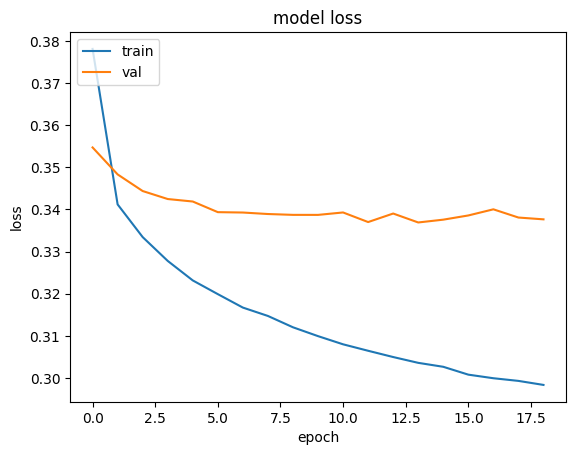

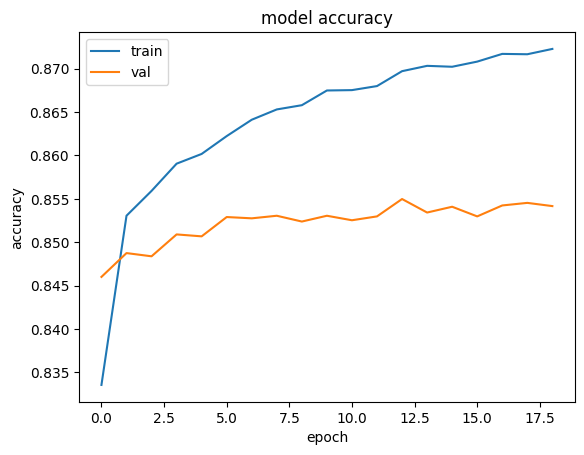

In [67]:
## Overfit Model
#############################
train_feature = train_data.drop('FireAlarm', axis=1)
train_output = train_data['FireAlarm']
valid_feature = valid_data.drop('FireAlarm', axis=1)
valid_output = valid_data['FireAlarm']
test_feature = test_data.drop('FireAlarm', axis=1)
test_output = test_data['FireAlarm']
verbose = 2
#############################
#############################
hidden_activation_func = 'relu'
output_activation_func = 'sigmoid'
batch_size = 64
epochs = 20
hidden_num = 2
nn = [16, 64]
#############################


general_model = train_nn_gen(hidden_num, nn, train_feature, train_output, epochs, test_feature, test_output, batch_size, verbose, hidden_activation_func, output_activation_func)

1475/1475 [==============================] - 2s 1ms/step
47181
7727
[[35213  1766]
 [ 4241  5961]]


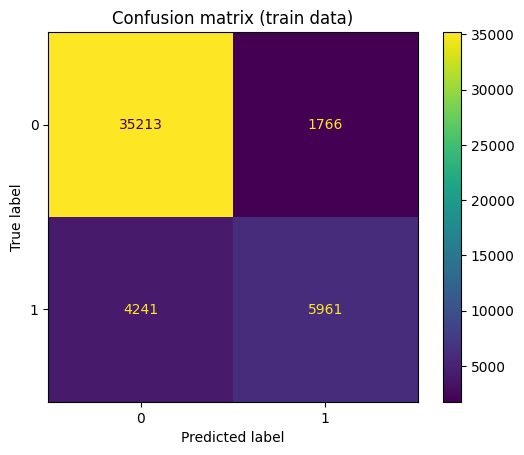

422/422 [==============================] - 0s 933us/step
13481
2236
[[9889  620]
 [1356 1616]]


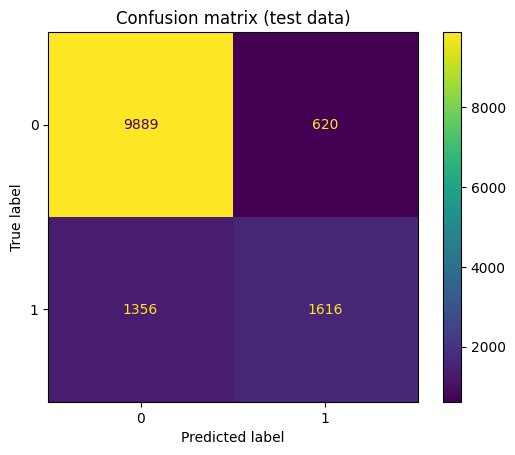

In [68]:
predict_train = general_model.predict(train_feature)
y_pred_train = np.where(predict_train<0.5,0,1)
print(len(y_pred_train))
print(y_pred_train.sum())
cm = confusion_matrix(train_output.to_numpy(), y_pred_train, labels=[0, 1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title ="Confusion matrix (train data)")
plt.show()    
predict_test = general_model.predict(test_feature)
y_pred_test = np.where(predict_test<0.5,0,1)
print(len(y_pred_test))
print(y_pred_test.sum())
cm = confusion_matrix(test_output.to_numpy(), y_pred_test, labels=[0, 1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title ="Confusion matrix (test data)")
plt.show()   

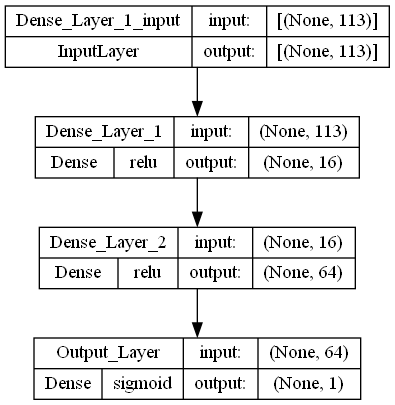

In [70]:
keras.utils.plot_model(general_model, show_layer_activations=True, show_shapes=True, show_layer_names=True)


In [ ]:
%tensorboard --logdir ./log
